In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno
import warnings
warnings.filterwarnings("ignore")
#%matplotlib inline
import ast
import math

In [2]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder

In [3]:
SFW  = pd.read_csv('sf_model_final.csv')

In [4]:
SFW

,Unnamed: 0,Job Role,Sector,Skill Title,Skill description,Skill Description,Job_Role_Replaced
0,0,Airport Emergency Assistant Manager,Air Transport,Accident and Incident Response Management,follow instructions processes accidents incide...,"follow,instructions,processes,accidents_incide...",airport emerg assist
1,20,Airport Emergency Manager,Air Transport,Accident and Incident Response Management,follow instructions processes accidents incide...,"follow,instructions,processes,accidents_incide...",airport emerg
2,39,Airport Emergency Officer,Air Transport,Accident and Incident Response Management,follow instructions processes accidents incide...,"follow,instructions,processes,accidents_incide...",airport emerg offic
3,1,Airport Emergency Assistant Manager,Air Transport,Airport Operations Management,identify different functions duties airport op...,"identify,different,functions,duties,airport,op...",airport emerg assist
4,21,Airport Emergency Manager,Air Transport,Airport Operations Management,identify different functions duties airport op...,"identify,different,functions,duties,airport,op...",airport emerg
...,...,...,...,...,...,...,...
31621,31621,Technical Officer,Built Environment,Technical Writing,draft technical reports according established ...,"draft,technical,reports,according,established,...",technic offic
31622,31622,Technical Officer,Built Environment,Technology Application,adopt new technologies enhance operations proc...,"adopt,new,technologies,enhance,operations,proc...",technic offic
31623,31623,Technical Officer,Built Environment,Value Engineering,apply developed processes procedures minimise ...,"apply,developed,processes,procedures,minimise,...",technic offic
31624,31624,Technical Officer,Built Environment,Workplace Safety and Health Culture Development,support workplace safety health wsh culture pr...,"support,workplace,safety,health,wsh,culture,pr...",technic offic


In [5]:
SFW_new2 = SFW.groupby(['Job_Role_Replaced', 'Sector']).agg({'Skill description': lambda series: list(series), 'Skill Title':lambda series: list(series)})

In [6]:
SFW_new2

,,Skill description,Skill Title
Job_Role_Replaced,Sector,,
#NAME?,Media,[apply negotiation skills techniques document ...,"[Business Negotiation, Content Acquisition Man..."
(airsid operations),Air Transport,[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
(baggag services),Air Transport,[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
(cargo),Air Transport,[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
(contact centr operations)/ (servic centres)/ (premium passeng services),Air Transport,[coordinate distribution channel partners prov...,"[Airline Distribution Channel Strategies, Airl..."
...,...,...,...
workplac safeti and health supervis,Workplace Safety and Health,[participate emergency response drills suggest...,"[Emergency Response Management, Hazards Identi..."
workshop - bus workshop,Public Transport,[prepare business units operational budgets ob...,"[Budgeting, Bus Air-Conditioning Systems Maint..."
workshop supervis / foreman - bus workshop,Public Transport,[conduct corrective maintenance bus airconditi...,"[Bus Air-Conditioning Systems Maintenance, Bus..."


In [12]:
SFW_new2.reset_index(inplace=True)

In [13]:
SFW_new2

,Job_Role_Replaced,Sector,Skill description,Skill Title
0,(airsid operations),Air Transport,[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
1,(baggag services),Air Transport,[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
2,(cargo),Air Transport,[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
3,(contact centr operations)/ (servic centres)/ ...,Air Transport,[coordinate distribution channel partners prov...,"[Airline Distribution Channel Strategies, Airl..."
4,(digit delivery),Built Environment,[use 3d modelling software create basic threed...,"[3D Modelling, Applications Integration, Appli..."
...,...,...,...,...
1244,workplac safeti and health supervisor,Workplace Safety and Health,[participate emergency response drills suggest...,"[Emergency Response Management, Hazards Identi..."
1245,workshop - bus workshop,Public Transport,[prepare business units operational budgets ob...,"[Budgeting, Bus Air-Conditioning Systems Maint..."
1246,workshop supervisor / foreman - bus workshop,Public Transport,[conduct corrective maintenance bus airconditi...,"[Bus Air-Conditioning Systems Maintenance, Bus..."
1247,youth work associ,Social Service,[support development case care plans support c...,"[Case and Care Planning, Casework Evaluation, ..."


In [14]:
SFW_new2['Skill description'] = SFW_new2['Skill description'].apply(lambda x:" ".join(a for a in x))

In [15]:
SFW_new2['Skill Title'] = SFW_new2['Skill Title'].apply(lambda x:" ".join(a for a in x))

In [17]:
SFW_new2.to_csv('sfw_sector.csv')

In [5]:
SFW_new = SFW.groupby('Job_Role_Replaced').agg({'Skill description': lambda series: list(series), 'Skill Title':lambda series: list(series)})

In [6]:
SFW_new

,Skill description,Skill Title
Job_Role_Replaced,,
(airsid operations),[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
(baggag services),[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
(cargo),[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
(contact centr operations)/ (servic centres)/ (premium passeng services),[coordinate distribution channel partners prov...,"[Airline Distribution Channel Strategies, Airl..."
(digit delivery),[use 3d modelling software create basic threed...,"[3D Modelling, Applications Integration, Appli..."
...,...,...
workplac safeti and health supervisor,[participate emergency response drills suggest...,"[Emergency Response Management, Hazards Identi..."
workshop - bus workshop,[prepare business units operational budgets ob...,"[Budgeting, Bus Air-Conditioning Systems Maint..."
workshop supervisor / foreman - bus workshop,[conduct corrective maintenance bus airconditi...,"[Bus Air-Conditioning Systems Maintenance, Bus..."


In [7]:
SFW_new.reset_index(inplace=True)

In [8]:
SFW_new

,Job_Role_Replaced,Skill description,Skill Title
0,(airsid operations),[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
1,(baggag services),[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
2,(cargo),[follow instructions processes accidents incid...,"[Accident and Incident Response Management, Ai..."
3,(contact centr operations)/ (servic centres)/ ...,[coordinate distribution channel partners prov...,"[Airline Distribution Channel Strategies, Airl..."
4,(digit delivery),[use 3d modelling software create basic threed...,"[3D Modelling, Applications Integration, Appli..."
...,...,...,...
1187,workplac safeti and health supervisor,[participate emergency response drills suggest...,"[Emergency Response Management, Hazards Identi..."
1188,workshop - bus workshop,[prepare business units operational budgets ob...,"[Budgeting, Bus Air-Conditioning Systems Maint..."
1189,workshop supervisor / foreman - bus workshop,[conduct corrective maintenance bus airconditi...,"[Bus Air-Conditioning Systems Maintenance, Bus..."
1190,youth work associ,[support development case care plans support c...,"[Case and Care Planning, Casework Evaluation, ..."


In [85]:
SFW_new['Skill description'] = SFW_new['Skill description'].apply(lambda x:" ".join(a for a in x))

In [88]:
SFW_new['Skill Title'] = SFW_new['Skill Title'].apply(lambda x:" ".join(a for a in x))

In [89]:
SFW_new

,Job_Role_Replaced,Skill description,Skill Title
0,(airsid operations),follow instructions processes accidents incide...,Accident and Incident Response Management Airp...
1,(baggag services),follow instructions processes accidents incide...,Accident and Incident Response Management Airc...
2,(cargo),follow instructions processes accidents incide...,Accident and Incident Response Management Air ...
3,(contact centr operations)/ (servic centres)/ ...,coordinate distribution channel partners provi...,Airline Distribution Channel Strategies Airlin...
4,(digit delivery),use 3d modelling software create basic threedi...,3D Modelling Applications Integration Applicat...
...,...,...,...
1187,workplac safeti and health supervisor,participate emergency response drills suggest ...,Emergency Response Management Hazards Identifi...
1188,workshop - bus workshop,prepare business units operational budgets obj...,Budgeting Bus Air-Conditioning Systems Mainten...
1189,workshop supervisor / foreman - bus workshop,conduct corrective maintenance bus airconditio...,Bus Air-Conditioning Systems Maintenance Bus B...
1190,youth work associ,support development case care plans support cl...,Case and Care Planning Casework Evaluation Cas...


In [106]:
SFW_new.to_csv('sfw_new.csv')

In [95]:
skill_counts = SFW_new['Skill description'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [96]:
skill_counts

,unique_values,counts
0,implement organisations asset management proce...,7
1,analyse areas existing operations improvement ...,4
2,implement organisations asset management proce...,4
3,create original concepts using different techn...,3
4,participate collaborative practices provide in...,3
...,...,...
1099,support execution organisations business conti...,1
1100,collect feedback customer experience analyze f...,1
1101,manage budgeting forecasting annual financial ...,1
1102,conceive business hypotheses operationalize da...,1


In [6]:
job_counts = SFW['Job_Role_Replaced'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [6]:
job_counts

,unique_values,counts
0,market,482
1,product,305
2,e-commerc,218
3,sale,171
4,project,156
...,...,...
1187,digit asset,3
1188,post-product assist,3
1189,digit asset librarian,3
1190,2nd assist cameraman/clapper/loader* (data wra...,2


In [7]:
skill_desc = SFW['Skill description'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [8]:
skill_desc

,unique_values,counts
0,uphold ethical standards performance individua...,157
1,apply continuous process improvement workplace...,122
2,identify key stakeholder relationships needs i...,121
3,maintain working level relationships support p...,117
4,apply business intelligence tools data analyti...,110
...,...,...
2691,evaluate quality business process improvement ...,1
2692,implement guidelines laws statutes regulations...,1
2693,establish organisational guidelines principles...,1
2694,research riskappetite related data information...,1


In [97]:
class Kmeans:
    """ 
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        Returns
        -------
        instance of kmeans class
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = skill_counts['unique_values']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

#create tfidf array based on unique industries

In [99]:
tf_idf_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

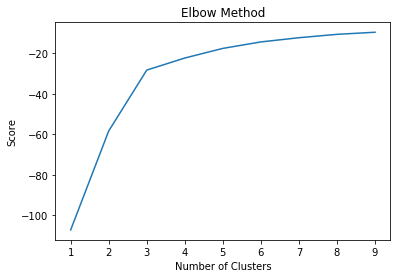

In [101]:
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

#from plot ideal number of clusters appears to be 4

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


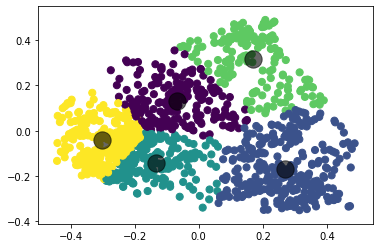

In [102]:
from sklearn.metrics import pairwise_distances
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(5, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [103]:
skill_counts['cluster'] = prediction

In [109]:
skill_counts

,unique_values,counts,cluster
0,implement organisations asset management proce...,7,1
1,analyse areas existing operations improvement ...,4,1
2,implement organisations asset management proce...,4,1
3,create original concepts using different techn...,3,2
4,participate collaborative practices provide in...,3,0
...,...,...,...
1099,support execution organisations business conti...,1,4
1100,collect feedback customer experience analyze f...,1,4
1101,manage budgeting forecasting annual financial ...,1,4
1102,conceive business hypotheses operationalize da...,1,0
